In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns


In [7]:
##
cars_file = '/content/mtcars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

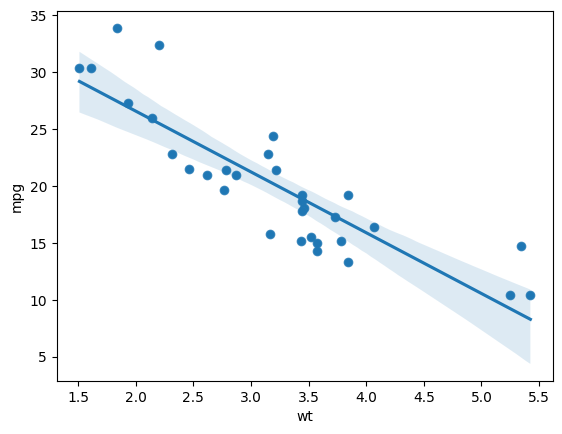

In [9]:
##Visualize the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [13]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X=torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np) #Convert reshaped array into tensor

In [14]:
# Model class
class LinearRegressionTorch(nn.Module):#self keyword is referring to the objects inside the class
  def __init__(self, input_size, output_size):
    super(LinearRegressionTorch, self).__init__()
    self.linear = nn.Linear(input_size, output_size) #creating internal object called 'linear

  def forward(self, x):
    out = self.linear(x)
    return out

In [15]:
input_dim =1
output_dim = 1
model = LinearRegressionTorch(input_dim, output_dim)

In [16]:
## Loss function
loss_fun = nn.MSELoss()

In [17]:
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [24]:
## Perform Training
losses, slope, bias = [],[],[]
NUM_EPOCHS = 1000
for epoch in range(NUM_EPOCHS):
  # set gradient to zero
  optimizer.zero_grad()

  #forward pass
  y_pred = model(X)

  ##calculate loss
  loss = loss_fun(y_pred, y_true)
  loss.backward()

  #update weights
  optimizer.step()

  #get parameters
  for name, param in model.named_parameters():
    if param.requires_grad:
      if name =='linear.weight':
        slope.append(param.data.numpy()[0][0])
      if name == 'linear.bias':
        bias.append(param.data.numpy()[0])

  # store loss
  losses.append(float(loss.data))

  #print loss
  if epoch % 100 ==0:
    print('Epoch: {}, Loss: {:.4f}'.format(epoch, loss.data))

Epoch: 0, Loss: 400.4089
Epoch: 100, Loss: 64.6936
Epoch: 200, Loss: 39.1538
Epoch: 300, Loss: 25.2627
Epoch: 400, Loss: 17.7073
Epoch: 500, Loss: 13.5980
Epoch: 600, Loss: 11.3629
Epoch: 700, Loss: 10.1472
Epoch: 800, Loss: 9.4860
Epoch: 900, Loss: 9.1264


<Axes: >

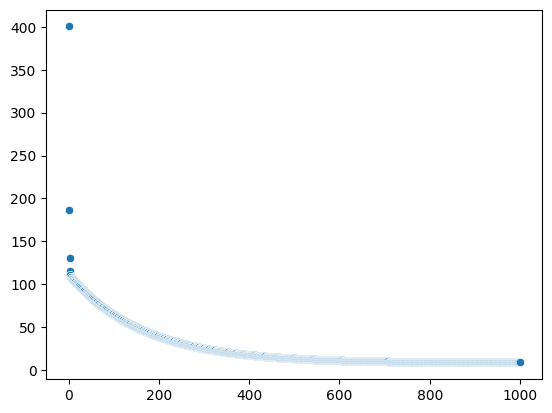

In [25]:
#Visualize the model trainning
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

<Axes: >

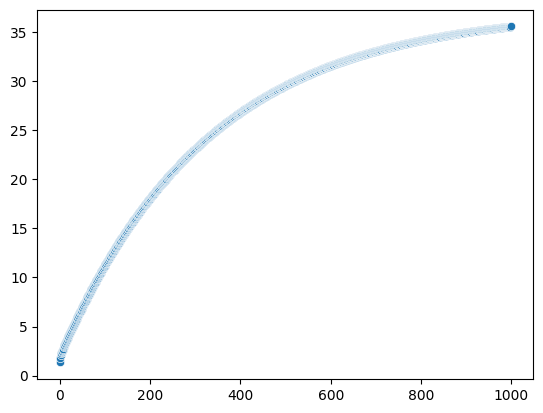

In [26]:
# Visualize the bias development
sns.scatterplot(x=range(NUM_EPOCHS), y=bias)

<Axes: >

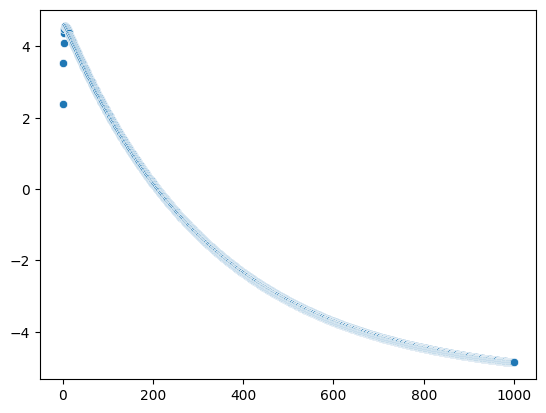

In [27]:
##visualize the slope development
sns.scatterplot(x= range(NUM_EPOCHS), y=slope)

<Axes: >

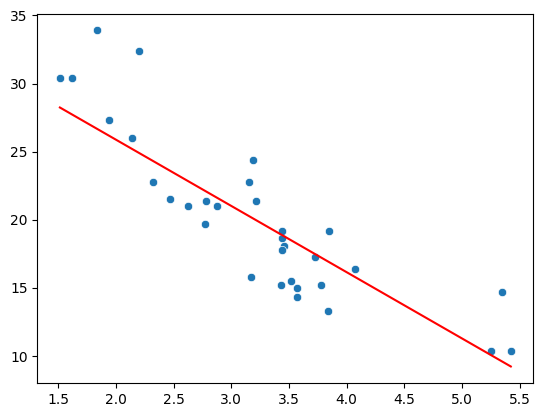

In [29]:
## Check the results
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')

In [30]:
# Optimum value - 37.3
bias

[1.3316829,
 1.7744205,
 2.0530708,
 2.247564,
 2.3988187,
 2.5277817,
 2.6451766,
 2.7564936,
 2.8645434,
 2.9707654,
 3.075897,
 3.180316,
 3.2842164,
 3.387698,
 3.4908123,
 3.5935862,
 3.6960337,
 3.7981627,
 3.8999777,
 4.001481,
 4.102675,
 4.203561,
 4.3041396,
 4.4044127,
 4.5043807,
 4.6040444,
 4.7034054,
 4.8024645,
 4.901222,
 4.9996796,
 5.0978374,
 5.1956973,
 5.2932596,
 5.390525,
 5.4874945,
 5.5841694,
 5.6805506,
 5.7766385,
 5.8724346,
 5.9679394,
 6.0631537,
 6.1580787,
 6.2527146,
 6.347063,
 6.4411244,
 6.5349,
 6.628391,
 6.721597,
 6.81452,
 6.9071603,
 6.999519,
 7.0915966,
 7.1833944,
 7.2749133,
 7.3661537,
 7.457117,
 7.547804,
 7.6382146,
 7.7283506,
 7.8182125,
 7.907801,
 7.9971175,
 8.086163,
 8.174936,
 8.26344,
 8.351675,
 8.439642,
 8.527342,
 8.614775,
 8.7019415,
 8.788843,
 8.875481,
 8.961855,
 9.047967,
 9.133817,
 9.219406,
 9.304735,
 9.389805,
 9.474615,
 9.559168,
 9.643464,
 9.727504,
 9.811288,
 9.894817,
 9.978092,
 10.061114,
 10.143884,


In [31]:
# Optimum value -5.3
slope

[2.3903959,
 3.527842,
 4.0951805,
 4.370718,
 4.496924,
 4.54673,
 4.5574713,
 4.5482593,
 4.5288777,
 4.5043344,
 4.477194,
 4.4487677,
 4.4197273,
 4.390417,
 4.3610125,
 4.331603,
 4.302235,
 4.272932,
 4.2437053,
 4.214561,
 4.185502,
 4.1565294,
 4.127644,
 4.0988464,
 4.070136,
 4.0415125,
 4.012976,
 3.9845266,
 3.9561636,
 3.9278867,
 3.8996959,
 3.8715906,
 3.843571,
 3.8156362,
 3.7877865,
 3.7600217,
 3.732341,
 3.7047446,
 3.677232,
 3.6498032,
 3.6224577,
 3.5951955,
 3.568016,
 3.5409193,
 3.5139048,
 3.4869726,
 3.460122,
 3.4333532,
 3.4066658,
 3.3800595,
 3.3535342,
 3.3270895,
 3.3007252,
 3.274441,
 3.248237,
 3.2221124,
 3.1960673,
 3.1701014,
 3.1442144,
 3.118406,
 3.0926762,
 3.0670245,
 3.041451,
 3.015955,
 2.9905367,
 2.9651957,
 2.9399316,
 2.9147446,
 2.889634,
 2.8645997,
 2.8396416,
 2.8147593,
 2.7899525,
 2.7652214,
 2.7405653,
 2.7159843,
 2.6914778,
 2.6670458,
 2.6426883,
 2.6184049,
 2.5941951,
 2.570059,
 2.5459962,
 2.5220068,
 2.49809,
 2.474246